In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from metrics import testMLModel
import seaborn as sns, matplotlib.pyplot as plt
import joblib
import ast

In [2]:
df = pd.read_csv("archive/clean_IMDB3.csv")

In [3]:
tfidf = TfidfVectorizer(max_features=25000)
X_tfidf = tfidf.fit_transform(df["clean_review"])
y = df["sentiment"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)

In [5]:
clf = LogisticRegression(max_iter=200, n_jobs=-1)
clf.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'



=== test Linear Regression : Rapport de classification ===
              precision    recall  f1-score   support

    negative     0.9036    0.8828    0.8931      5000
    positive     0.8854    0.9058    0.8955      5000

    accuracy                         0.8943     10000
   macro avg     0.8945    0.8943    0.8943     10000
weighted avg     0.8945    0.8943    0.8943     10000

=== test Linear Regression : Matrice de confusion ===


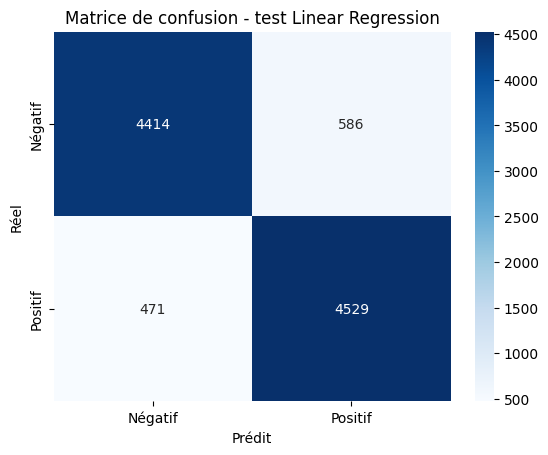

=== test Linear Regression : Courbe d'apprentissage (accuracy) ===


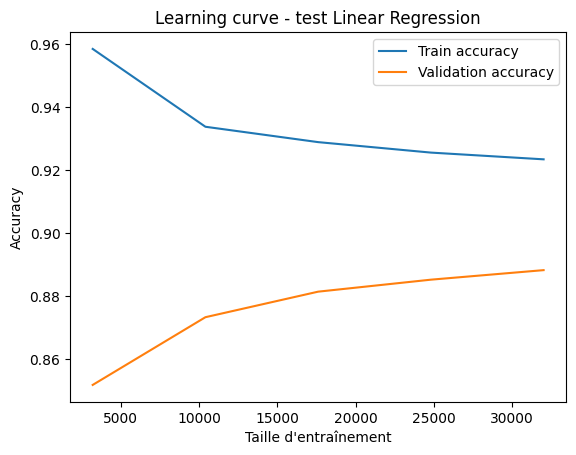

In [10]:
testMLModel(clf,X_train, y_train, X_test, y_test, "test Linear Regression")

In [11]:
y_pred = clf.predict(X_test)

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      5000
    positive       0.89      0.91      0.90      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



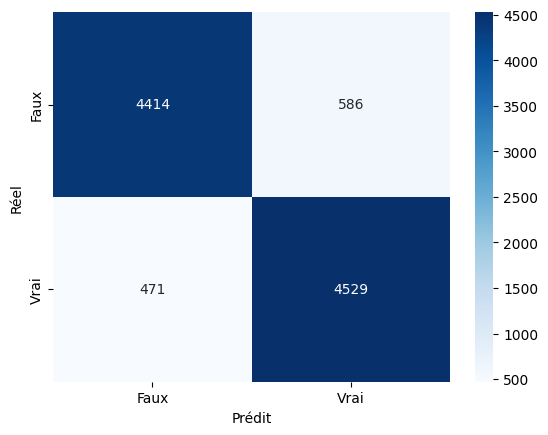

In [13]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Faux", "Vrai"],
            yticklabels=["Faux", "Vrai"])
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()

In [14]:
joblib.dump(clf,"modelML/rl/rlmodelV1.pkl")

['modelML/rl/rlmodelV1.pkl']